# Importation & lecture 

In [1]:
import pandas as pd
import os

In [2]:
# Chemin vers le dossier contenant les fichiers CSV
csv_path = os.path.join('.', 'csv')

# Charger l'index des partitions
partition_index = pd.read_csv('imputed_stage_index.csv')

# charger les informations générales sur les patients 
general_table = pd.read_csv('general_table.csv')


# Afficher les données pour le patient 1

In [3]:

patient_id = partition_index['patientid'][0]
partition = partition_index['part'][0]
#afficher la ligne du patient dans la table générale
print(general_table[general_table['patientid'] == patient_id])

# Charger les données du premier patient depuis le fichier CSV correspondant
file_path = os.path.join(csv_path, f'part-{partition}.csv')
patient_data = pd.read_csv(file_path, usecols=['patientid', 'reldatetime', 'vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87'])
patient_data = patient_data[patient_data['patientid'] == patient_id]

# Calculer la moyenne et l'écart-type de la colonne 'vm1'
vm1_mean = patient_data['vm1'].mean()
vm1_std = patient_data['vm1'].std()

# Afficher les résultats
print(f'Mean of vm1 for patient {patient_id}: {vm1_mean}')
print(f'Standard deviation of vm1 for patient {patient_id}: {vm1_std}')

   patientid     admissiontime sex  age discharge_status
0          1  03/04/2197 19:15   M   75            alive
Mean of vm1 for patient 1: 89.6054054054054
Standard deviation of vm1 for patient 1: 5.153573546181877


In [11]:
#le nombre de données pour le patient 1
patient_data.shape


(370, 20)

In [13]:
patient_data.head()

patientid  reldatetime   vm1    vm3   vm4   vm5  vm13   vm20  vm28  vm62  \
0          1          0.0  97.0  112.0  52.0  71.0   5.3  100.0  -5.0  23.7   
1          1          0.0  97.0  112.0  52.0  71.0   5.2  100.0  -5.0  23.7   
2          1        300.0  97.0  143.0  68.0  92.0   5.3  100.0  -5.0  24.2   
3          1        300.0  97.0  143.0  68.0  92.0   5.2  100.0  -5.0  24.2   
4          1        600.0  99.0  123.0  58.0  79.0   5.3  100.0  -5.0  25.3   

   vm136  vm146  vm172  vm174  vm176  pm41  pm42  pm43  pm44  pm87  
0    1.0    1.0   0.95    5.0    4.0   0.0   0.0   0.0   0.0   0.0  
1    1.0    1.0   0.95    5.0    4.0   0.0   0.0   0.0   0.0   0.0  
2    1.0    1.0   0.95    5.0    4.0   0.0   0.0   0.0   0.0   0.0  
3    1.0    1.0   0.95    5.0    4.0   0.0   0.0   0.0   0.0   0.0  
4    1.0    1.0   1.05    5.0    4.0   0.0   0.0   0.0   0.0   0.0

In [12]:
patient_data.describe()

patientid   reldatetime         vm1         vm3         vm4  \
count      370.0    370.000000  370.000000  370.000000  370.000000   
mean         1.0  27600.000000   89.605405  106.540541   49.427027   
std          0.0  16042.930211    5.153574   11.605051    5.228266   
min          1.0      0.000000   80.000000   77.000000   21.000000   
25%          1.0  13800.000000   85.000000   98.000000   47.000000   
50%          1.0  27600.000000   89.000000  107.000000   49.000000   
75%          1.0  41400.000000   93.000000  113.000000   52.000000   
max          1.0  55200.000000  105.000000  143.000000   68.000000   

              vm5        vm13        vm20        vm28        vm62       vm136  \
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean    67.783784    5.250000   99.448649   -1.929730   18.567568    1.328649   
std      6.359318    0.050068    1.905295    1.806472    5.563706    0.331361   
min     54.000000    5.200000   79.000000   -5.000000   15.400000    1.000000   
25%     64.000000    5.200000  100.000000   -4.000000   15.700000    1.000000   
50%     68.000000    5.250000  100.000000   -1.000000   15.700000    1.300000   
75%     72.000000    5.300000  100.000000   -1.000000   19.300000    1.800000   
max     92.000000    5.300000  100.000000    0.000000   38.200000    1.800000   

       vm146       vm172       vm174       vm176   pm41   pm42   pm43   pm44  \
count  370.0  370.000000  370.000000  370.000000  370.0  370.0  370.0  370.0   
mean     1.0    1.036378   10.627568   17.794595    0.0    0.0    0.0    0.0   
std      0.0    0.020624    1.994368   20.440169    0.0    0.0    0.0    0.0   
min      1.0    0.950000    5.000000    4.000000    0.0    0.0    0.0    0.0   
25%      1.0    1.010000    9.100000    4.000000    0.0    0.0    0.0    0.0   
50%      1.0    1.050000    9.300000    4.000000    0.0    0.0    0.0    0.0   
75%      1.0    1.050000   11.900000   48.000000    0.0    0.0    0.0    0.0   
max      1.0    1.050000   14.200000   48.000000    0.0    0.0    0.0    0.0   

             pm87  
count  370.000000  
mean     0.081081  
std      0.273329  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

# Classifier les données pour les patients

Circulatory state annotation
We annotated every 5-min interval of a patient’s stay with their current circulatory state using 3 types of variables: lactate (arterial and venous), MAP and presence of vasoactive/inotropic drugs. The state was established using a window of 45-min duration centered on the current time point. To reduce spurious calls due to transient states, in each such window all conditions had to be independently true for 30 min (not necessarily consecutive).

We defined the following three states:

Patient currently not in circulatory failure: if MAP is >65 mmHg, vasoactive/inotropic drugs are not present, and lactate is ≤2 mmol l–1.

Patient currently in circulatory failure: MAP is ≤65 mmHg, or (not exclusive) vasoactive/inotropic drugs are present and lactate is >2 mmol l–1.

Unknown/ambiguous: if any of the following conditions hold:

No MAP or (interpolated) lactate is available in the 45-min window

MAP or vasoactive/inotropic drug criterion is met, but lactate is ≤2 mmol l–1

To enable state annotation at all time points, we imputed lactate values between measurements. We linearly interpolated lactate values between measurements, unless the patient’s lactate value had passed the threshold of 2 mmol l–1 in either direction. If a patient’s state had changed, from either low to high lactate or vice versa, we linearly interpolated depending on the interval between the two measurements. If they were less than 6 h apart we interpolated for the full period. Otherwise, we forward/backward filled for a maximum of 3 h and the remaining time points were left missing.

To handle the starts/ends of the stay, we filled forward/backward. If the patient’s first/last measurement was ‘normal’ (under the threshold), we backward/forward filled indefinitely. If the measurement was abnormal, we filled backward/forward for up to 3 h.

As this imputation scheme implicitly used information from the future, it was only used for annotating (and subsequently labeling) time points. Adaptive imputation and feature generation for model development were performed independently and as described below without using future information.

In [3]:
!pip install tqdm

In [90]:
import pandas as pd
import os
import numpy as np

def interpolate_lactate(patient_data):
    patient_data['vm136'].interpolate(method='linear', inplace=True)
    patient_data['vm146'].interpolate(method='linear', inplace=True)
    return patient_data

def fill_missing_values(patient_data):
    patient_data.fillna(method='ffill', inplace=True)
    patient_data.fillna(method='bfill', inplace=True)
    return patient_data

def annotate_data(patient_data):
    # Calculer les états circulatoires pour chaque point de données
    patient_data['circulatory_state'] = "Unknown/ambiguous"

    for idx, row in patient_data.iterrows():
        not_in_failure_condition = (row['vm5'] > 65) & (row['vm136'] <= 2) & (row['vm146'] <= 2) & (row['pm41'] == 0) & (row['pm42'] == 0) & (row['pm43'] == 0) & (row['pm44'] == 0)
        in_failure_condition = (row['vm5'] <= 65) | (((row['vm136'] > 2) | (row['vm146'] > 2)) & ((row['pm41'] != 0) | (row['pm42'] != 0) | (row['pm43'] != 0) | (row['pm44'] != 0)))

        if not_in_failure_condition:
            patient_data.loc[idx, 'circulatory_state'] = "Stable"
        elif in_failure_condition:
            patient_data.loc[idx, 'circulatory_state'] = "Failure"

    return patient_data

# Charger l'index des partitions
partition_index = pd.read_csv('imputed_stage_index.csv')

# charger les informations générales 
general_table = pd.read_csv('general_table.csv')

# # Charger l'index des partitions
# partition_index = pd.read_csv('imputed_stage_index.csv')

# # charger les informations générales sur les patients
# general_table = pd.read_csv('general_table.csv')

# Créer une liste de tous les IDs de patients uniques
patient_ids = general_table['patientid'].unique()

# Initialiser une liste pour stocker les annotations de tous les patient
annotations = []

# Traiter chaque patient
for patient_id in patient_ids:
    if patient_id % 100 == 0:
        print(f"Traitement du patient {patient_id}/{patient_ids[-1]}")
    
    # Trouver l'index correspondant au patient dans l'index des partitions
    index = partition_index[partition_index['patientid'] == patient_id].index[0]

    # Récupérer le numéro de partition associé 
    partition = partition_index['part'][index]

    # Charger les données du patient
    file_path = os.path.join('csv', f'part-{partition}.csv')
    patient_data = pd.read_csv(file_path)
    patient_data = patient_data[patient_data['patientid'] == patient_id]

    # Sélectionner uniquement les colonnes utiles
    columns_of_interest = ['patientid', 'reldatetime', 'vm5', 'vm136', 'vm146', 'pm41', 'pm42', 'pm43', 'pm44']
    patient_data = patient_data[columns_of_interest]

    # Supprimer les doublons
    patient_data.drop_duplicates(inplace=True)

    # Traiter les données du patient
    patient_data = interpolate_lactate(patient_data)
    patient_data = fill_missing_values(patient_data)

    #ajouter annotation
    patient_data = annotate_data(patient_data)

    # Stocker les annotations pour le patient dans la liste globale
    patient_annotations = patient_data[['patientid', 'reldatetime', 'circulatory_state']]
    annotations.append(patient_annotations)

# Concaténer les annotations
all_annotations = pd.concat(annotations)

# Enregistrer df en CSV 
all_annotations.to_csv('patient_annotations.csv', index=False)

print("Le fichier 'patient_annotations.csv' a été créé avec succès.")



Traitement du patient 1100/10000
Traitement du patient 1200/10000
Traitement du patient 1300/10000
Traitement du patient 1400/10000
Traitement du patient 1500/10000
Traitement du patient 1600/10000
Traitement du patient 1700/10000
Traitement du patient 1800/10000
Traitement du patient 1900/10000
Traitement du patient 2000/10000
Traitement du patient 2100/10000
Traitement du patient 2200/10000
Traitement du patient 2300/10000
Traitement du patient 2400/10000
Traitement du patient 2500/10000
Traitement du patient 2600/10000
Traitement du patient 2700/10000
Traitement du patient 2800/10000
Traitement du patient 2900/10000
Traitement du patient 3000/10000
Traitement du patient 3100/10000
Traitement du patient 3200/10000
Traitement du patient 3300/10000
Traitement du patient 3400/10000
Traitement du patient 3500/10000
Traitement du patient 3600/10000
Traitement du patient 3700/10000
Traitement du patient 3800/10000
Traitement du patient 3900/10000
Traitement du patient 4000/10000
Traitement

100%|██████████| 33905/33905 [5:48:31<00:00,  1.62it/s]        
Le fichier 'patient_annotations.csv' a été créé avec succès.

# Classification avec windowing

In [94]:
import pandas as pd
from tqdm import tqdm

def get_window_indices(i, window_size):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(df) - 1, i + window_size // 2)
    return start_idx, end_idx

def get_majority_state(window, min_element_same):
    state_count = window["circulatory_state"].value_counts()
    max_state = state_count.idxmax()
    max_state_count = state_count.max()

    if max_state == "Unknown/ambiguous" and max_state_count >= min_element_same:
        return "Unknown/ambiguous"
    elif max_state_count >= min_element_same:
        return max_state
    else:
        return "Stable"

# Lecture du fichier CSV
df = pd.read_csv("patient_annotations_all.csv", sep=",")

# Paramètres de la fenêtre
window_size_element = 9
min_element_same = 6

# Création d'une nouvelle colonne pour stocker les classes
df["class"] = ""

# Parcours des lignes avec la barre de progression
for i in tqdm(range(len(df))):
    if i != 0 and df.iloc[i]["patientid"] == df.iloc[i - 1]["patientid"]:
        start_idx, end_idx = get_window_indices(i, window_size_element)
        window = df.iloc[start_idx:end_idx + 1]
        df.at[i, "class"] = get_majority_state(window, min_element_same)
    else:
        df.at[i, "class"] = "Stable"

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv('patient_classified_all_data.csv', index=False)

print("Le fichier 'patient_classified_all_data.csv' a été créé avec succès.")


100%|██████████| 28254426/28254426 [4:33:10<00:00, 1723.81it/s]  


Le fichier 'patient_classified_all_data.csv' a été créé avec succès.


100%|██████████| 28254426/28254426 [4:33:10<00:00, 1723.81it/s]  
Le fichier 'patient_classified_all_data.csv' a été créé avec succès.

In [95]:
#eteindre pc forcer
import os
# os.system("shutdown /s /t 1")


0

# Traitement du fichier d'annotations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier all_patient_annotations.csv
annotations = pd.read_csv('patient_classified_all_data.csv')

Afficher annotation pour un patient

C:\Users\antho\AppData\Local\Temp/ipykernel_5164/158243462.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_data['reldatetime'] = pd.to_timedelta(failure_data['reldatetime']).dt.total_seconds() / 60
C:\Users\antho\AppData\Local\Temp/ipykernel_5164/158243462.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stable_data['reldatetime'] = pd.to_timedelta(stable_data['reldatetime']).dt.total_seconds() / 60
C:\Users\antho\AppData\Local\Temp/ipykernel_5164/158243462.py:12: SettingWithCopyWarning: 
A

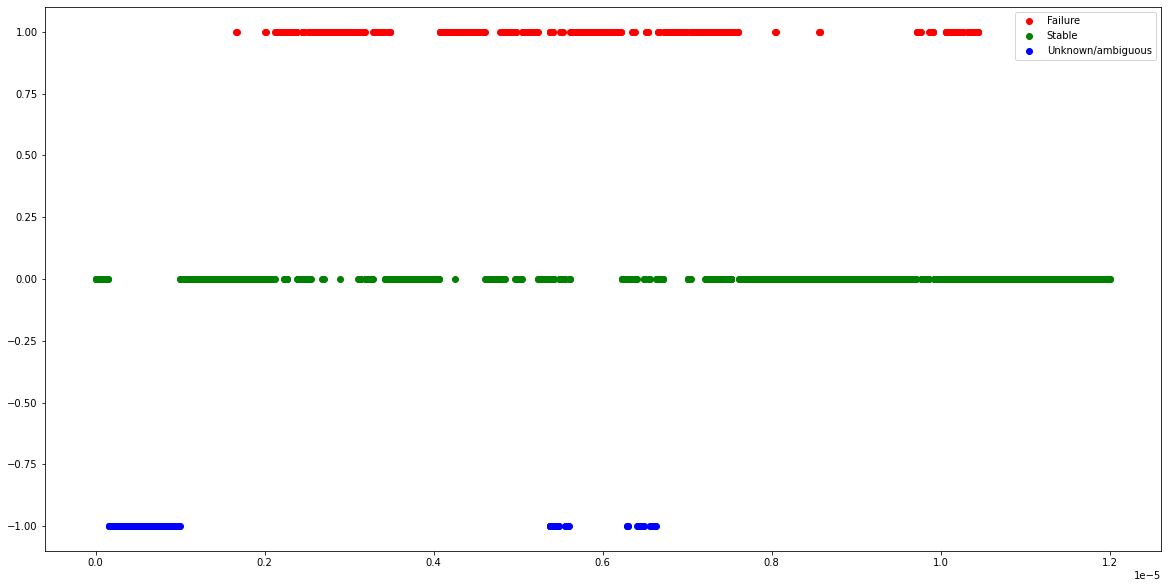

In [7]:
#afficher les deux premiers patients seulement
annotations_df = annotations[annotations['patientid'] ==2]

# Filtrer les données pour les patients stable, failure, and unknonwn
failure_data = annotations_df[annotations_df['class'] == 'Failure']
stable_data = annotations_df[annotations_df['class'] == 'Stable']
unknown_data = annotations_df[annotations_df['class'] == 'Unknown/ambiguous']

# Convertir 'reldatetime'  en minutes
failure_data['reldatetime'] = pd.to_timedelta(failure_data['reldatetime']).dt.total_seconds() / 60
stable_data['reldatetime'] = pd.to_timedelta(stable_data['reldatetime']).dt.total_seconds() / 60
unknown_data['reldatetime'] = pd.to_timedelta(unknown_data['reldatetime']).dt.total_seconds() / 60

#afficher sous forme de graphique si stable y =0, si failure y=1, si unknown y=-1
plt.figure(figsize=(20, 10))
plt.plot(failure_data['reldatetime'], np.ones(len(failure_data)), 'ro', label='Failure')
plt.plot(stable_data['reldatetime'], np.zeros(len(stable_data)), 'go', label='Stable')
plt.plot(unknown_data['reldatetime'], -np.ones(len(unknown_data)), 'bo', label='Unknown/ambiguous')
plt.legend()
plt.show()



C:\Users\antho\AppData\Local\Temp/ipykernel_5164/2918295220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_data['reldatetime'] = pd.to_timedelta(failure_data['reldatetime']).dt.total_seconds() / 60
C:\Users\antho\AppData\Local\Temp/ipykernel_5164/2918295220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stable_data['reldatetime'] = pd.to_timedelta(stable_data['reldatetime']).dt.total_seconds() / 60


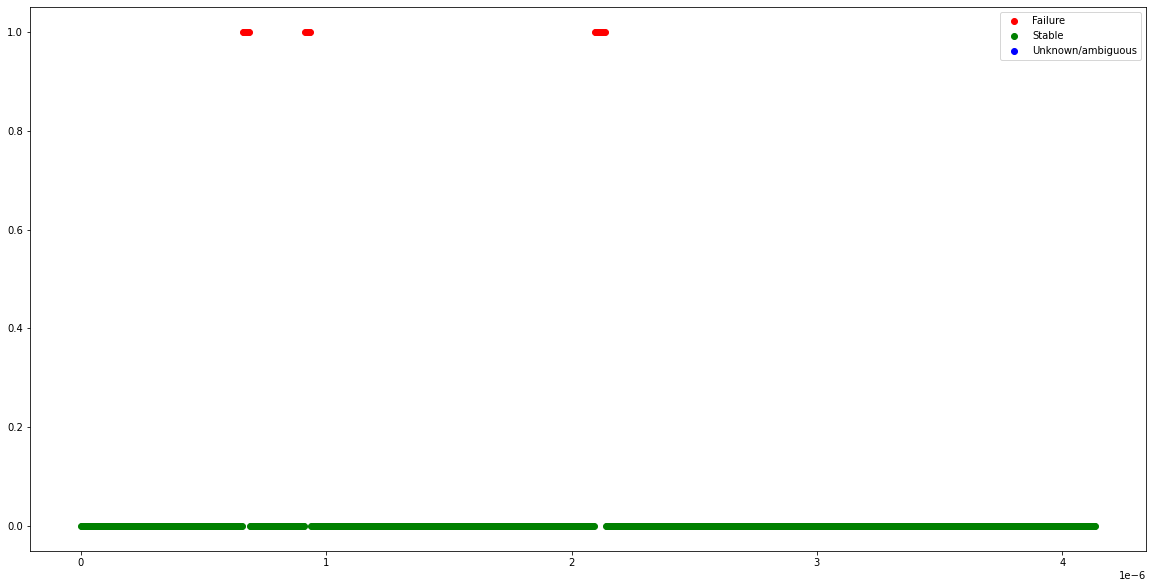

In [8]:
#afficher les deux premiers patients seulement
annotations_df = annotations[annotations['patientid'] ==5]

# Filtrer les données pour les patients stable, failure, and unknonwn
failure_data = annotations_df[annotations_df['class'] == 'Failure']
stable_data = annotations_df[annotations_df['class'] == 'Stable']
unknown_data = annotations_df[annotations_df['class'] == 'Unknown/ambiguous']

# Convertir 'reldatetime'  en minutes
failure_data['reldatetime'] = pd.to_timedelta(failure_data['reldatetime']).dt.total_seconds() / 60
stable_data['reldatetime'] = pd.to_timedelta(stable_data['reldatetime']).dt.total_seconds() / 60
unknown_data['reldatetime'] = pd.to_timedelta(unknown_data['reldatetime']).dt.total_seconds() / 60

#afficher sous forme de graphique si stable y =0, si failure y=1, si unknown y=-1
plt.figure(figsize=(20, 10))
plt.plot(failure_data['reldatetime'], np.ones(len(failure_data)), 'ro', label='Failure')
plt.plot(stable_data['reldatetime'], np.zeros(len(stable_data)), 'go', label='Stable')
plt.plot(unknown_data['reldatetime'], -np.ones(len(unknown_data)), 'bo', label='Unknown/ambiguous')
plt.legend()
plt.show()



Afficher des données générales

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer le nombre de données par patient
data_per_patient = annotations.groupby('patientid').size()

#calculer le nombre de données
total_data = data_per_patient.sum()

# Afficher les statistiques
print(f"Nombre de données  :\n{total_data}")
print(f"Nombre de données par patient :\n{data_per_patient}")
#

Nombre de données  :
28254426
Nombre de données par patient :
patientid
1         185
2        3274
3         216
4        3146
5         828
         ... 
33901    3267
33902     194
33903     271
33904    2393
33905     173
Length: 33905, dtype: int64


Les patients et les états: est-ce qu'un patient est seulement stable ?

Pourcentage de patients uniquement stable: 26.69%
Pourcentage de patients stable et failure: 32.32%
Pourcentage de patients stable et unknown: 7.60%
Pourcentage de patients avec les trois états: 33.39%


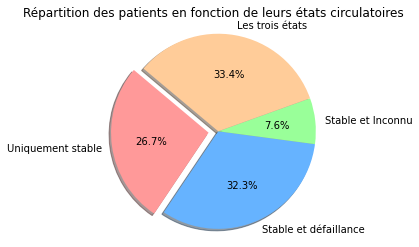

In [10]:
import pandas as pd

# Charger le fichier all_patient_annotations.csv
annotations = pd.read_csv('patient_classified_all_data.csv')

# Compter le nombre de patients dans chaque état circulatoire par patient
circulatory_state_counts = annotations.groupby('patientid')['class'].value_counts().unstack(fill_value=0)

# Trouver les patients qui font uniquement stable, stable et failure, stable et unknown, et les trois
only_stable = circulatory_state_counts[(circulatory_state_counts['Stable'] > 0) & (circulatory_state_counts['Failure'] == 0) & (circulatory_state_counts['Unknown/ambiguous'] == 0)].shape[0]
stable_and_failure = circulatory_state_counts[(circulatory_state_counts['Stable'] > 0) & (circulatory_state_counts['Failure'] > 0) & (circulatory_state_counts['Unknown/ambiguous'] == 0)].shape[0]
stable_and_unknown = circulatory_state_counts[(circulatory_state_counts['Stable'] > 0) & (circulatory_state_counts['Failure'] == 0) & (circulatory_state_counts['Unknown/ambiguous'] > 0)].shape[0]
all_three = circulatory_state_counts[(circulatory_state_counts['Stable'] > 0) & (circulatory_state_counts['Failure'] > 0) & (circulatory_state_counts['Unknown/ambiguous'] > 0)].shape[0]

# Calculer les pourcentages
total_patients = circulatory_state_counts.shape[0]
only_stable_percentage = (only_stable / total_patients) * 100
stable_and_failure_percentage = (stable_and_failure / total_patients) * 100
stable_and_unknown_percentage = (stable_and_unknown / total_patients) * 100
all_three_percentage = (all_three / total_patients) * 100

# Afficher les pourcentages
print(f"Pourcentage de patients uniquement stable: {only_stable_percentage:.2f}%")
print(f"Pourcentage de patients stable et failure: {stable_and_failure_percentage:.2f}%")
print(f"Pourcentage de patients stable et unknown: {stable_and_unknown_percentage:.2f}%")
print(f"Pourcentage de patients avec les trois états: {all_three_percentage:.2f}%")

# Créer le graphique à secteurs
labels = ['Uniquement stable', 'Stable et défaillance', 'Stable et Inconnu', 'Les trois états']
sizes = [only_stable, stable_and_failure, stable_and_unknown, all_three]
colors = ['#ff9999','#66b3ff','#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Répartition des patients en fonction de leurs états circulatoires")

# Afficher le graphique
plt.show()



Répartition des états en fonction du temps, indépendamment du patient

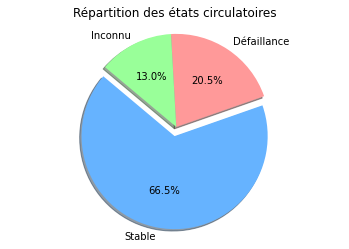

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier 
annotations = pd.read_csv('patient_classified_all_data.csv')

# Compter le nombre d'occurrences pour chaque état 
circulatory_state_counts = annotations['class'].value_counts()

# Calculer le pourcentage de chaque état circulatoire
total_counts = circulatory_state_counts.sum()
stable_percentage = (circulatory_state_counts['Stable'] / total_counts) * 100
failure_percentage = (circulatory_state_counts['Failure'] / total_counts) * 100
unknown_percentage = (circulatory_state_counts['Unknown/ambiguous'] / total_counts) * 100

# # Vérifier que les pourcentages somment bien à 100
# assert round(stable_percentage + failure_percentage + unknown_percentage, 2) == 100.00

# Créer le graphique à secteurs
labels = ['Stable', 'Défaillance', 'Inconnu']
sizes = [stable_percentage, failure_percentage, unknown_percentage]
colors = ['#66b3ff','#ff9999', '#99ff99']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Répartition des états circulatoires")

# Afficher le graphique
plt.show()


Affichage des 100 premier 

C:\Users\antho\AppData\Local\Temp/ipykernel_5164/1819604286.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_data['reldatetime'] = pd.to_timedelta(failure_data['reldatetime']).dt.total_seconds() / 60
C:\Users\antho\AppData\Local\Temp/ipykernel_5164/1819604286.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stable_data['reldatetime'] = pd.to_timedelta(stable_data['reldatetime']).dt.total_seconds() / 60
C:\Users\antho\AppData\Local\Temp/ipykernel_5164/1819604286.py:12: SettingWithCopyWarning:

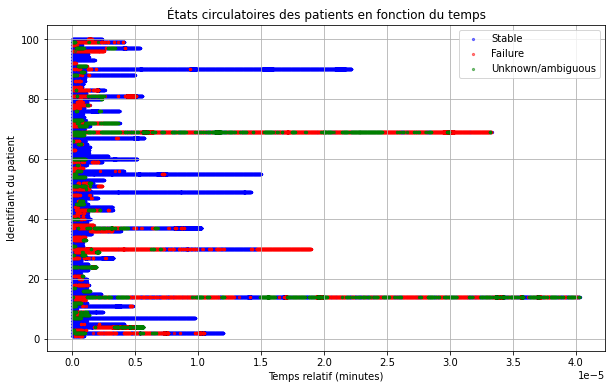

In [12]:

#sélectionner les 1000 premiers patients
annotations_df = annotations[annotations['patientid'] <= 100]

# Filtrer les données pour les patients en fonction de l'état
failure_data = annotations_df[annotations_df['class'] == 'Failure']
stable_data = annotations_df[annotations_df['class'] == 'Stable']
unknown_data = annotations_df[annotations_df['class'] == 'Unknown/ambiguous']

# Convertir 'reldatetime' en minutes
failure_data['reldatetime'] = pd.to_timedelta(failure_data['reldatetime']).dt.total_seconds() / 60
stable_data['reldatetime'] = pd.to_timedelta(stable_data['reldatetime']).dt.total_seconds() / 60
unknown_data['reldatetime'] = pd.to_timedelta(unknown_data['reldatetime']).dt.total_seconds() / 60

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.scatter(stable_data['reldatetime'], stable_data['patientid'], s=5, alpha=0.5, color='blue', label='Stable')
plt.scatter(failure_data['reldatetime'], failure_data['patientid'], s=5, alpha=0.5, color='red', label='Failure')
plt.scatter(unknown_data['reldatetime'], unknown_data['patientid'], s=5, alpha=0.5, color='green', label='Unknown/ambiguous')
plt.xlabel('Temps relatif (minutes)')
plt.ylabel('Identifiant du patient')
plt.title("États circulatoires des patients en fonction du temps")
plt.grid(True)
plt.legend()

# Afficher le graphique
plt.show()

Quand apparait le premier failure pour les 100 premiers patients (reprend le df de la cellule précédente)

In [13]:
# Identifier les patients en failure
failure_patients = annotations_df[annotations_df['class'] == 'Failure']['patientid'].unique()

# Calculer le moment relatif l'apparition de la première failure
failure_ratios = []
for patient_id in failure_patients:
    patient_data = annotations_df[annotations_df['patientid'] == patient_id]
    
    failure_time = patient_data[patient_data['class'] == 'Failure']['reldatetime'].min()
    # print(failure_time)
    treatment_duration = patient_data['reldatetime'].max() - patient_data['reldatetime'].min()
    
    # Calculer le ratio firstFailure / temps total
    failure_ratio = (failure_time / treatment_duration)
    failure_ratios.append(failure_ratio)

# Calculer la moyenne
average_failure_ratio = np.mean(failure_ratios)
average_failure_percentage = average_failure_ratio * 100
print(f"La failure apparaît en moyenne à {average_failure_percentage:.2f}% de la durée totale du traitement pour les patients en failure.")


La failure apparaît en moyenne à 16.14% de la durée totale du traitement pour les patients en failure.


# Traitement de 2 classes uniquement : stable et failure

supprimer les patients qui présentes des moments inconnues

In [15]:
import pandas as pd

# Charger le fichier
annotations = pd.read_csv('patient_classified_all_data.csv')

# Identifier les patients qui ont au moins un moment inconnu
unknown_patients = annotations[annotations['class'] == 'Unknown/ambiguous']['patientid'].unique()
print(f"Nombre de patients avec au moins un moment inconnu: {len(unknown_patients)}")

# Filtrer données pour supprimer les états inconnus
filtered_annotations = annotations[~annotations['patientid'].isin(unknown_patients)]

# Vérifier que les états inconnus ont été supprimés
assert filtered_annotations['class'].str.contains('Unknown/ambiguous').sum() == 0

# Sauvegarder les données filtrées dans un nouveau fichier CSV
filtered_annotations.to_csv('patient_classified_filtered_data.csv', index=False)


Nombre de patients avec au moins un moment inconnu: 13898


Nombre de patients avec des moments de failure: 10957
Nombre de patients sans moments de failure: 9050


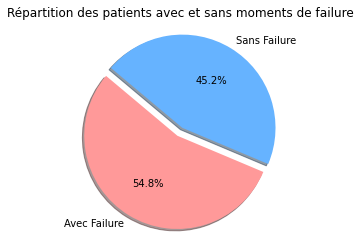

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Compter le nombre de patients
total_patients = annotations['patientid'].nunique()

# Trouver les patients avec des moments de failure
failure_patients = annotations[annotations['class'] == 'Failure']['patientid'].unique()

# Calculer le nombre et le pourcentage de patients avec des moments de failure
failure_patients_count = len(failure_patients)
print(f"Nombre de patients avec des moments de failure: {failure_patients_count}")
failure_patients_percentage = (failure_patients_count / total_patients) * 100

# Calculer le nombre et le pourcentage de patients sans moments de failure
non_failure_patients_count = total_patients - failure_patients_count
print(f"Nombre de patients sans moments de failure: {non_failure_patients_count}")
non_failure_patients_percentage = (non_failure_patients_count / total_patients) * 100

# Créer le graphique à secteurs
labels = ['Avec Failure', 'Sans Failure']
sizes = [failure_patients_percentage, non_failure_patients_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Répartition des patients avec et sans moments de failure")

# Afficher le graphique
plt.show()


c'est donc assez équilibré 

In [33]:
import os
import pandas as pd
from tqdm import tqdm

# Charger l'index des partitions
partition_index = pd.read_csv('imputed_stage_index.csv')

# charger les informations générales 
general_table = pd.read_csv('general_table.csv')

# Créer une liste de tous les IDs de patients uniques
annotations_df = pd.read_csv('patient_classified_filtered_data.csv')

#récupérer les numéros de patients uniques de annotations_df
patient_ids = annotations_df['patientid'].unique()

print(patient_ids)
# nombre de patients uniques
print(len(patient_ids))

# Initialiser une liste pour stocker les annotations de tous les patient
patient_annotations_list = []

# Traiter chaque patient
for patient_id in tqdm(patient_ids):
    
    # Trouver l'index correspondant au patient dans l'index des partitions
    index = partition_index[partition_index['patientid'] == patient_id].index[0]

    # Récupérer le numéro de partition associé 
    partition = partition_index['part'][index]

    # Charger les données du patient
    file_path = os.path.join('csv', f'part-{partition}.csv')
    patient_data = pd.read_csv(file_path)
    patient_data = patient_data[patient_data['patientid'] == patient_id]

    #merge avec les annotations pour ce patient contenu dans annotations_df
    patient_annotations = annotations_df[annotations_df['patientid'] == patient_id]
    patient_data = pd.merge(patient_annotations,patient_data , on='reldatetime', how='left')
    #delete patientid_y
    patient_data = patient_data.drop(columns=['patientid_y'])
    #rename patientid_x to patientid
    patient_data = patient_data.rename(columns={'patientid_x': 'patientid'})

    #sauvegarder les données du patient
    patient_annotations_list.append(patient_data)




[    1     5     6 ... 33902 33903 33905]
20007


100%|██████████| 20007/20007 [1:53:28<00:00,  2.94it/s]  


PermissionError: [Errno 13] Permission denied: 'patient_data_22.csv'

In [38]:
annotations = pd.concat(patient_annotations_list)
annotations.to_csv('patient_data_222.csv', index=False)

In [39]:
#compter le nombre de patients dans patient_data_22.csv
annotations = pd.read_csv('patient_data_222.csv')
annotations['patientid'].nunique()


20007

### kmeans

tout d'abord, un test: en utilisant les annotations

tout d'abord avec deux clusters

In [19]:
data = data[data['patientid'] <= 100]
#nombre patient uni ue
data['patientid'].nunique()

51

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 5 premiers patients
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Choisir le nombre de clusters
n_clusters = 2

# Initialiser le modèle de clustering K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Effectuer le clustering sur toutes les données
cluster_labels = kmeans.fit_predict(scaled_data)

# Ajouter les labels de cluster au DataFrame d'origine
data['cluster'] = cluster_labels

# Afficher les résultats
print(data)

# Sauvegarder les résultats dans un fichier CSV
data.to_csv('patient_clusters_no_window.csv', index=False)


       patientid  reldatetime circulatory_state   class   vm1    vm3   vm4  \
0              1          0.0            Stable  Stable  97.0  112.0  52.0   
1              1          0.0            Stable  Stable  97.0  112.0  52.0   
2              1        300.0            Stable  Stable  97.0  143.0  68.0   
3              1        300.0            Stable  Stable  97.0  143.0  68.0   
4              1        600.0            Stable  Stable  99.0  123.0  58.0   
...          ...          ...               ...     ...   ...    ...   ...   
79529        100     141600.0            Stable  Stable  68.0  123.0  71.0   
79530        100     141600.0            Stable  Stable  68.0  123.0  71.0   
79531        100     141900.0            Stable  Stable  63.0  123.0  71.0   
79532        100     141900.0            Stable  Stable  63.0  123.0  71.0   
79533        100     141900.0            Stable  Stable  63.0  123.0  71.0   

        vm5  vm13   vm20  ...  vm146  vm172     vm174  vm176  p

In [14]:
from sklearn.preprocessing import LabelEncoder

# Lire les fichiers CSV
results = pd.read_csv('patient_clusters.csv')
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels
results = results.merge(annotations, on=['patientid', 'reldatetime'])

# Instancier et entraîner le LabelEncoder
le = LabelEncoder()
le.fit(results['class'])

# Comparer class et cluster
results['class'] = le.transform(results['class'])
results['match'] = results['class'] == results['cluster']

# Afficher les résultats
print(results)

# Calculer le pourcentage de match
match_percentage = results['match'].sum() / len(results) * 100
print(f"Pourcentage de match: {match_percentage:.2f}%")


      patientid  reldatetime  cluster circulatory_state  class  match
0           1.0        600.0      1.0            Stable      1   True
1           1.0        600.0      0.0            Stable      1  False
2           1.0        900.0      0.0            Stable      1  False
3           1.0        900.0      0.0            Stable      1  False
4           1.0       1200.0      1.0           Failure      1   True
...         ...          ...      ...               ...    ...    ...
1527       10.0      19200.0      1.0            Stable      1   True
1528       10.0      19500.0      1.0            Stable      1   True
1529       10.0      19500.0      1.0            Stable      1   True
1530       10.0      19800.0      0.0            Stable      1  False
1531       10.0      19800.0      0.0            Stable      1  False

[1532 rows x 6 columns]
Pourcentage de match: 40.99%


In [17]:
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics.pairwise import euclidean_distances

# Charger les données des étiquettes réelles
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels en utilisant la méthode merge, en sélectionnant uniquement les colonnes nécessaires
results = data.merge(annotations[['patientid', 'reldatetime', 'class']], on=['patientid', 'reldatetime'], suffixes=('', '_true'))

# Calculer l'indice de Rand ajusté (ARI)
ari = adjusted_rand_score(results['class'], results['cluster'])
print(f"Indice de Rand ajusté: {ari:.4f}")

# # Calculer le coefficient de silhouette
# # Calculer la matrice des distances pour les données valides
# distances = euclidean_distances(scaled_data)

# Obtenir les étiquettes de cluster valides (en supposant qu'il n'y a pas de valeurs NaN)
valid_labels = data['cluster']

from sklearn.metrics import silhouette_score

# Définir la taille de l'échantillon pour l'approximation--> mille points aléatoires
sample_size = 1000

# Calculer le coefficient de silhouette pour les données valides en utilisant l'approximation
silhouette = silhouette_score(scaled_data, valid_labels, metric='euclidean', sample_size=sample_size)
print(f"Coefficient de silhouette (approximatif): {silhouette:.4f}")


# Calculer la mesure V
v_measure = v_measure_score(results['class'], results['cluster'])
print(f"Mesure V: {v_measure:.4f}")


Indice de Rand ajusté: 0.0533
Coefficient de silhouette (approximatif): 0.1742
Mesure V: 0.0953


Dans ce cas, avec 79 534 points de données, --> matrice de distances de taille 79 534 x 79 534-->47,1 GiB de mémoire 

# Quel est le meilleure K cluster ? 

c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Le meilleur nombre de clusters est : 11


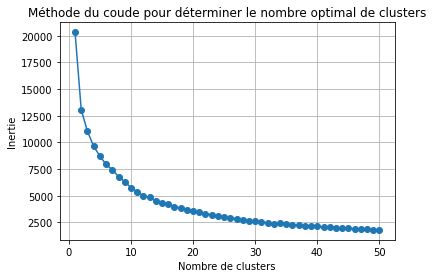

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 10 premiers patients (4 patient)
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Calculer la somme des carrés des distances intra-cluster pour différents nombres de clusters
inertias = []
max_clusters = 50
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

    
# Calculer les rapports pour chaque point
ratios = []
for i in range(1, len(inertias) - 1):
    diff_inertia = inertias[i - 1] - inertias[i]
    diff_next_inertia = inertias[i] - inertias[i + 1]
    distance = np.sqrt((i - (i + 1))**2 + (diff_inertia - diff_next_inertia)**2)
    ratio = diff_next_inertia / distance
    ratios.append(ratio)

# Trouver l'indice du point "coude" avec le rapport le plus élevé
elbow_index = np.argmax(ratios) + 1

# Afficher le meilleur nombre de clusters
print(f"Le meilleur nombre de clusters est : {elbow_index + 1}")

# Visualiser les résultats avec la méthode du coude
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid()
plt.show()


Le meilleur nombre de clusters est : 9


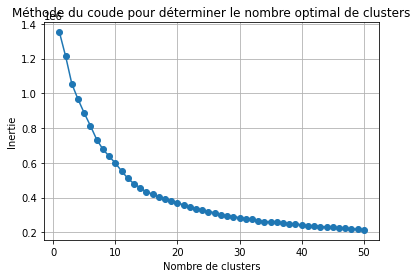

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 100 premiers patients (51 patients)
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Calculer la somme des carrés des distances intra-cluster pour différents nombres de clusters
inertias = []
max_clusters = 50
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

    
# Calculer les rapports pour chaque point
ratios = []
for i in range(1, len(inertias) - 1):
    diff_inertia = inertias[i - 1] - inertias[i]
    diff_next_inertia = inertias[i] - inertias[i + 1]
    distance = np.sqrt((i - (i + 1))**2 + (diff_inertia - diff_next_inertia)**2)
    ratio = diff_next_inertia / distance
    ratios.append(ratio)

# Trouver l'indice du point "coude" avec le rapport le plus élevé
elbow_index = np.argmax(ratios) + 1

# Afficher le meilleur nombre de clusters
print(f"Le meilleur nombre de clusters est : {elbow_index + 1}")

# Visualiser les résultats avec la méthode du coude
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid()
plt.show()


# Avec k optimal = 9

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 5 premiers patients
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Choisir le nombre de clusters
n_clusters = 9

# Initialiser le modèle de clustering K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Effectuer le clustering sur toutes les données
cluster_labels = kmeans.fit_predict(scaled_data)

# Ajouter les labels de cluster au DataFrame d'origine
data['cluster'] = cluster_labels

# Afficher les résultats
print(data)

# Sauvegarder les résultats dans un fichier CSV
data.to_csv('patient_clusters_no_window.csv', index=False)


       patientid  reldatetime circulatory_state   class   vm1    vm3   vm4  \
0              1          0.0            Stable  Stable  97.0  112.0  52.0   
1              1          0.0            Stable  Stable  97.0  112.0  52.0   
2              1        300.0            Stable  Stable  97.0  143.0  68.0   
3              1        300.0            Stable  Stable  97.0  143.0  68.0   
4              1        600.0            Stable  Stable  99.0  123.0  58.0   
...          ...          ...               ...     ...   ...    ...   ...   
79529        100     141600.0            Stable  Stable  68.0  123.0  71.0   
79530        100     141600.0            Stable  Stable  68.0  123.0  71.0   
79531        100     141900.0            Stable  Stable  63.0  123.0  71.0   
79532        100     141900.0            Stable  Stable  63.0  123.0  71.0   
79533        100     141900.0            Stable  Stable  63.0  123.0  71.0   

        vm5  vm13   vm20  ...  vm146  vm172     vm174  vm176  p

In [21]:
# from sklearn.preprocessing import LabelEncoder

# # Lire les fichiers CSV
# results = pd.read_csv('patient_clusters.csv')
# annotations = pd.read_csv('patient_classified_filtered_data.csv')

# # Fusionner les résultats avec les états réels
# results = results.merge(annotations, on=['patientid', 'reldatetime'])

# # Instancier et entraîner le LabelEncoder
# le = LabelEncoder()
# le.fit(results['class'])

# # Comparer class et cluster
# results['class'] = le.transform(results['class'])
# results['match'] = results['class'] == results['cluster']

# # Afficher les résultats
# print(results)

# # Calculer le pourcentage de match
# match_percentage = results['match'].sum() / len(results) * 100
# print(f"Pourcentage de match: {match_percentage:.2f}%")


In [22]:
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics.pairwise import euclidean_distances

# Charger les données des étiquettes réelles
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels en utilisant la méthode merge, en sélectionnant uniquement les colonnes nécessaires
results = data.merge(annotations[['patientid', 'reldatetime', 'class']], on=['patientid', 'reldatetime'], suffixes=('', '_true'))

# Calculer l'indice de Rand ajusté (ARI)
ari = adjusted_rand_score(results['class'], results['cluster'])
print(f"Indice de Rand ajusté: {ari:.4f}")

# # Calculer le coefficient de silhouette
# # Calculer la matrice des distances pour les données valides
# distances = euclidean_distances(scaled_data)

# Obtenir les étiquettes de cluster valides (en supposant qu'il n'y a pas de valeurs NaN)
valid_labels = data['cluster']

from sklearn.metrics import silhouette_score

# Définir la taille de l'échantillon pour l'approximation--> mille points aléatoires
sample_size = 1000

# Calculer le coefficient de silhouette pour les données valides en utilisant l'approximation
silhouette = silhouette_score(scaled_data, valid_labels, metric='euclidean', sample_size=sample_size)
print(f"Coefficient de silhouette (approximatif): {silhouette:.4f}")


# Calculer la mesure V
v_measure = v_measure_score(results['class'], results['cluster'])
print(f"Mesure V: {v_measure:.4f}")


Indice de Rand ajusté: 0.0144
Coefficient de silhouette (approximatif): 0.2238
Mesure V: 0.0653


# avec fenetre glissante

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 5 premiers patients
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Choisir le nombre de clusters (modifiez cette valeur en fonction de vos besoins)
n_clusters = 2

# Initialiser le modèle de clustering K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Créer un dataframe vide pour stocker les résultats
results = pd.DataFrame(columns=['patientid', 'reldatetime', 'cluster'])

# Utiliser une fenêtre glissante pour traiter chaque fenêtre de 9 éléments
window_size = 9
for i in tqdm(range(len(scaled_data) - window_size + 1)):
    window = scaled_data[i:i+window_size]
    
    # Vérifier si la fenêtre concerne un seul patient
    if len(data.iloc[i:i+window_size]['patientid'].unique()) == 1:
        # Effectuer le clustering sur la fenêtre
        cluster_labels = kmeans.fit_predict(window)
        
        # Ajouter le cluster du point courant (élément central de la fenêtre) au dataframe des résultats
        results = results.append({
            'patientid': data.iloc[i+window_size//2]['patientid'],
            'reldatetime': data.iloc[i+window_size//2]['reldatetime'],
            'cluster': cluster_labels[window_size//2]
        }, ignore_index=True)

# Afficher les résultats
print(results)
# sauvegarder les résultats dans un fichier CSV
results.to_csv('patient_clusters.csv', index=False)


100%|██████████| 1556/1556 [00:31<00:00, 49.43it/s]

      patientid  reldatetime  cluster
0           1.0        600.0      1.0
1           1.0        600.0      0.0
2           1.0        900.0      0.0
3           1.0        900.0      0.0
4           1.0       1200.0      1.0
...         ...          ...      ...
1527       10.0      19200.0      1.0
1528       10.0      19500.0      1.0
1529       10.0      19500.0      1.0
1530       10.0      19800.0      0.0
1531       10.0      19800.0      0.0

[1532 rows x 3 columns]


In [28]:
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics.pairwise import euclidean_distances

# Charger les données des étiquettes réelles
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels en utilisant la méthode merge, en sélectionnant uniquement les colonnes nécessaires
results = results.merge(annotations[['patientid', 'reldatetime', 'class']], on=['patientid', 'reldatetime'], suffixes=('', '_true'))

# Ajouter la colonne 'cluster' à 'results'
results['cluster'] = valid_labels

# Calculer l'indice de Rand ajusté (ARI)
ari = adjusted_rand_score(results['class'], results['cluster'])
print(f"Indice de Rand ajusté: {ari:.4f}")

# Obtenir les étiquettes de cluster valides (en supposant qu'il n'y a pas de valeurs NaN)
valid_labels = results['cluster']

from sklearn.metrics import silhouette_score

# Définir la taille de l'échantillon pour l'approximation--> mille points aléatoires
sample_size = 1000

# Calculer le coefficient de silhouette pour les données valides en utilisant l'approximation
silhouette = silhouette_score(scaled_data, valid_labels, metric='euclidean', sample_size=sample_size)
print(f"Coefficient de silhouette (approximatif): {silhouette:.4f}")

# Calculer la mesure V
v_measure = v_measure_score(results['class'], results['cluster'])
print(f"Mesure V: {v_measure:.4f}")


Indice de Rand ajusté: 0.1358
Coefficient de silhouette (approximatif): 0.3034
Mesure V: 0.1191


In [29]:
# comparer les résultats avec les états réels
results = pd.read_csv('patient_clusters.csv')
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels
results = results.merge(annotations, on=['patientid', 'reldatetime'])

#comparer class et cluster
results['class'] = le.transform(results['class'])
results['match'] = results['class'] == results['cluster']

# Afficher les résultats
print(results)

#calculer le pourcentage de match
match_percentage = results['match'].sum() / len(results) * 100
print(f"Pourcentage de match: {match_percentage:.2f}%")


      patientid  reldatetime  cluster circulatory_state  class  match
0           1.0        600.0      1.0            Stable      1   True
1           1.0        600.0      0.0            Stable      1  False
2           1.0        900.0      0.0            Stable      1  False
3           1.0        900.0      0.0            Stable      1  False
4           1.0       1200.0      1.0           Failure      1   True
...         ...          ...      ...               ...    ...    ...
1527       10.0      19200.0      1.0            Stable      1   True
1528       10.0      19500.0      1.0            Stable      1   True
1529       10.0      19500.0      1.0            Stable      1   True
1530       10.0      19800.0      0.0            Stable      1  False
1531       10.0      19800.0      0.0            Stable      1  False

[1532 rows x 6 columns]
Pourcentage de match: 40.99%


avec 3 clusters

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 5 premiers patients
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Choisir le nombre de clusters (modifiez cette valeur en fonction de vos besoins)
n_clusters = 3

# Initialiser le modèle de clustering K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Créer un dataframe vide pour stocker les résultats
results = pd.DataFrame(columns=['patientid', 'reldatetime', 'cluster'])

# Utiliser une fenêtre glissante pour traiter chaque fenêtre de 9 éléments
window_size = 9
for i in tqdm(range(len(scaled_data) - window_size + 1)):
    window = scaled_data[i:i+window_size]
    
    # Vérifier si la fenêtre concerne un seul patient
    if len(data.iloc[i:i+window_size]['patientid'].unique()) == 1:
        # Effectuer le clustering sur la fenêtre
        cluster_labels = kmeans.fit_predict(window)
        
        # Ajouter le cluster du point courant (élément central de la fenêtre) au dataframe des résultats
        results = results.append({
            'patientid': data.iloc[i+window_size//2]['patientid'],
            'reldatetime': data.iloc[i+window_size//2]['reldatetime'],
            'cluster': cluster_labels[window_size//2]
        }, ignore_index=True)

# Afficher les résultats
print(results)
# sauvegarder les résultats dans un fichier CSV
results.to_csv('patient_clusters.csv', index=False)


  3%|▎         | 2143/79526 [00:57<32:23, 39.82it/s]c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possi

       patientid  reldatetime  cluster
0            1.0        600.0      1.0
1            1.0        600.0      1.0
2            1.0        900.0      0.0
3            1.0        900.0      0.0
4            1.0       1200.0      0.0
...          ...          ...      ...
79121      100.0     141300.0      0.0
79122      100.0     141300.0      1.0
79123      100.0     141300.0      2.0
79124      100.0     141600.0      0.0
79125      100.0     141600.0      2.0

[79126 rows x 3 columns]


In [40]:
# Charger les données des étiquettes réelles
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels en utilisant la méthode merge, en sélectionnant uniquement les colonnes nécessaires
results = results.merge(annotations[['patientid', 'reldatetime', 'class']], on=['patientid', 'reldatetime'], suffixes=('', '_true'))

# Supprimer les lignes avec des NaN
results.dropna(inplace=True)

# Ajouter la colonne 'cluster' à 'results'
results['cluster'] = valid_labels

# Calculer l'indice de Rand ajusté (ARI)
ari = adjusted_rand_score(results['class'], results['cluster'])
print(f"Indice de Rand ajusté: {ari:.4f}")

# Obtenir les étiquettes de cluster valides 
# valid_labels = results['cluster']

# Définir la taille de l'échantillon pour l'approximation--> mille points aléatoires
sample_size = 1000
# Calculer le coefficient de silhouette pour les données valides en utilisant l'approximation
valid_indices = results.index.values

valid_data = scaled_data[valid_indices, :]
valid_labels = results['cluster']

silhouette = silhouette_score(valid_data, valid_labels, metric='euclidean', sample_size=sample_size)
print(f"Coefficient de silhouette (approximatif): {silhouette:.4f}")

# Calculer la mesure V
v_measure = v_measure_score(results['class'], results['cluster'])
print(f"Mesure V: {v_measure:.4f}")


Indice de Rand ajusté: 0.1114
Coefficient de silhouette (approximatif): 0.2682
Mesure V: 0.0878


windows size 72

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 5 premiers patients
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Choisir le nombre de clusters 
n_clusters = 2

# Initialiser le modèle de clustering K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Créer un dataframe vide pour stocker les résultats
results = pd.DataFrame(columns=['patientid', 'reldatetime', 'cluster'])

# Utiliser une fenêtre glissante pour traiter chaque fenêtre de 9 éléments
window_size = 72
for i in tqdm(range(len(scaled_data) - window_size + 1)):
    window = scaled_data[i:i+window_size]
    
    # Vérifier si la fenêtre concerne un seul patient
    if len(data.iloc[i:i+window_size]['patientid'].unique()) == 1:
        # Effectuer le clustering sur la fenêtre
        cluster_labels = kmeans.fit_predict(window)
        
        # Ajouter le cluster du point courant (élément central de la fenêtre) au dataframe des résultats
        results = results.append({
            'patientid': data.iloc[i+window_size//2]['patientid'],
            'reldatetime': data.iloc[i+window_size//2]['reldatetime'],
            'cluster': cluster_labels[window_size//2]
        }, ignore_index=True)

# Afficher les résultats
print(results)
# sauvegarder les résultats dans un fichier CSV
results.to_csv('patient_clusters.csv', index=False)


100%|██████████| 79463/79463 [30:13<00:00, 43.81it/s] 


       patientid  reldatetime  cluster
0            1.0       5400.0      0.0
1            1.0       5400.0      0.0
2            1.0       5700.0      0.0
3            1.0       5700.0      0.0
4            1.0       6000.0      0.0
...          ...          ...      ...
75926      100.0     138000.0      0.0
75927      100.0     138300.0      0.0
75928      100.0     138300.0      0.0
75929      100.0     138300.0      1.0
75930      100.0     138600.0      1.0

[75931 rows x 3 columns]


In [33]:
# Charger les données des étiquettes réelles
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels en utilisant la méthode merge, en sélectionnant uniquement les colonnes nécessaires
results = results.merge(annotations[['patientid', 'reldatetime', 'class']], on=['patientid', 'reldatetime'], suffixes=('', '_true'))

# Supprimer les lignes avec des NaN
results.dropna(inplace=True)

# Ajouter la colonne 'cluster' à 'results'
results['cluster'] = valid_labels

# Calculer l'indice de Rand ajusté (ARI)
ari = adjusted_rand_score(results['class'], results['cluster'])
print(f"Indice de Rand ajusté: {ari:.4f}")

# Obtenir les étiquettes de cluster valides 
# valid_labels = results['cluster']

# Définir la taille de l'échantillon pour l'approximation--> mille points aléatoires
sample_size = 1000
# Calculer le coefficient de silhouette pour les données valides en utilisant l'approximation
valid_indices = results.index.values

valid_data = scaled_data[valid_indices, :]
valid_labels = results['cluster']

silhouette = silhouette_score(valid_data, valid_labels, metric='euclidean', sample_size=sample_size)
print(f"Coefficient de silhouette (approximatif): {silhouette:.4f}")

# Calculer la mesure V
v_measure = v_measure_score(results['class'], results['cluster'])
print(f"Mesure V: {v_measure:.4f}")


Indice de Rand ajusté: 0.0339
Coefficient de silhouette (approximatif): 0.2476
Mesure V: 0.0078


windows size 72 and 9 clusters

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Charger les données
data = pd.read_csv('patient_data_222.csv')

# Sélectionner les 5 premiers patients
data = data[data['patientid'] <= 100]

# Choisir les colonnes pour le clustering
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster = data[columns_to_cluster]

# Normaliser les données pour une meilleure performance du clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_cluster)

# Choisir le nombre de clusters 
n_clusters = 9

# Initialiser le modèle de clustering K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Créer un dataframe vide pour stocker les résultats
results = pd.DataFrame(columns=['patientid', 'reldatetime', 'cluster'])

# Utiliser une fenêtre glissante pour traiter chaque fenêtre de 9 éléments
window_size = 72
for i in tqdm(range(len(scaled_data) - window_size + 1)):
    window = scaled_data[i:i+window_size]
    
    # Vérifier si la fenêtre concerne un seul patient
    if len(data.iloc[i:i+window_size]['patientid'].unique()) == 1:
        # Effectuer le clustering sur la fenêtre
        cluster_labels = kmeans.fit_predict(window)
        
        # Ajouter le cluster du point courant (élément central de la fenêtre) au dataframe des résultats
        results = results.append({
            'patientid': data.iloc[i+window_size//2]['patientid'],
            'reldatetime': data.iloc[i+window_size//2]['reldatetime'],
            'cluster': cluster_labels[window_size//2]
        }, ignore_index=True)

# Afficher les résultats
print(results)
# sauvegarder les résultats dans un fichier CSV
results.to_csv('patient_clusters.csv', index=False)


 19%|█▉        | 15036/79463 [10:48<45:59, 23.35it/s]  c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
 19%|█▉        | 15039/79463 [10:49<1:54:56,  9.34it/s]c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\antho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of dist

       patientid  reldatetime  cluster
0            1.0       5400.0      2.0
1            1.0       5400.0      1.0
2            1.0       5700.0      5.0
3            1.0       5700.0      4.0
4            1.0       6000.0      4.0
...          ...          ...      ...
75926      100.0     138000.0      2.0
75927      100.0     138300.0      1.0
75928      100.0     138300.0      2.0
75929      100.0     138300.0      1.0
75930      100.0     138600.0      8.0

[75931 rows x 3 columns]


In [35]:
# Charger les données des étiquettes réelles
annotations = pd.read_csv('patient_classified_filtered_data.csv')

# Fusionner les résultats avec les états réels en utilisant la méthode merge, en sélectionnant uniquement les colonnes nécessaires
results = results.merge(annotations[['patientid', 'reldatetime', 'class']], on=['patientid', 'reldatetime'], suffixes=('', '_true'))

# Supprimer les lignes avec des NaN
results.dropna(inplace=True)

# Ajouter la colonne 'cluster' à 'results'
results['cluster'] = valid_labels

# Calculer l'indice de Rand ajusté (ARI)
ari = adjusted_rand_score(results['class'], results['cluster'])
print(f"Indice de Rand ajusté: {ari:.4f}")

# Obtenir les étiquettes de cluster valides 
# valid_labels = results['cluster']

# Définir la taille de l'échantillon pour l'approximation--> mille points aléatoires
sample_size = 1000
# Calculer le coefficient de silhouette pour les données valides en utilisant l'approximation
valid_indices = results.index.values

valid_data = scaled_data[valid_indices, :]
valid_labels = results['cluster']

silhouette = silhouette_score(valid_data, valid_labels, metric='euclidean', sample_size=sample_size)
print(f"Coefficient de silhouette (approximatif): {silhouette:.4f}")

# Calculer la mesure V
v_measure = v_measure_score(results['class'], results['cluster'])
print(f"Mesure V: {v_measure:.4f}")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [37]:
print("NaNs in 'class':", results['class'].isna().any())
print("NaNs in 'cluster':", results['cluster'].isna().any())


NaNs in 'class': False
NaNs in 'cluster': True


DBSCAN

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Charger les données
data = pd.read_csv('patient_classified_filtered_data.csv')

# Sélectionner les 5 premiers patients
data = data[data['patientid'] <= 5]

# Prétraitement des données
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

# Choisir les paramètres pour DBSCAN (modifiez ces valeurs en fonction de vos besoins)
eps = 1000  # Augmentez ou diminuez cette valeur
min_samples = 2


# Initialiser le modèle de clustering DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Créer un dataframe vide pour stocker les résultats
results = pd.DataFrame(columns=['patientid', 'reldatetime', 'cluster'])

# Utiliser une fenêtre glissante pour traiter chaque fenêtre de 9 éléments
window_size = 9
for i in tqdm(range(len(data) - window_size + 1)):
    window = data.iloc[i:i+window_size]
    
    # Vérifier si la fenêtre concerne un seul patient
    if len(window['patientid'].unique()) == 1:
        # Effectuer le clustering sur la fenêtre
        cluster_labels = dbscan.fit_predict(window[['reldatetime', 'class']])
        
        # Ajouter le cluster du point courant (élément central de la fenêtre) au dataframe des résultats
        results = results.append({
            'patientid': window.iloc[window_size//2]['patientid'],
            'reldatetime': window.iloc[window_size//2]['reldatetime'],
            'cluster': cluster_labels[window_size//2]
        }, ignore_index=True)

# Afficher les résultats
print(results)


100%|██████████| 1005/1005 [00:02<00:00, 385.21it/s]

     patientid  reldatetime  cluster
0          1.0       1200.0      0.0
1          1.0       1500.0      0.0
2          1.0       1800.0      0.0
3          1.0       2100.0      0.0
4          1.0       2400.0      0.0
..         ...          ...      ...
992        5.0     245700.0      0.0
993        5.0     246000.0      0.0
994        5.0     246300.0      0.0
995        5.0     246600.0      0.0
996        5.0     246900.0      0.0

[997 rows x 3 columns]


In [10]:
#afficher le nombre de clusters
print(f"Nombre de clusters: {results['cluster'].nunique()}")

Nombre de clusters: 1


# Active learning

les étapes  pour l'apprentissage avec l'apprentissage actif:

- crée modèle ou prendre modèle existant, frise et réentrainement (attention au surapprentissage)

- utiliser un pourcentage de données labélisé 1% pour l'entrainement initial
- évaluer les performances
- visualiser les clusters avec valeurs annotées. (utiliser PCA pour visualiser en 2D ou 3D)
- demander l'annotation pour les cluster sans annotation
- utiliser les clusters pour demander d'annoter des nouvelles valeurs ambigues / incertain
-mettre à jour le modèle avec les nouvelles annotations--> réentrainement
- évaluer les performances
boucles jusqu'à performances satisfaisant:
    - identificationd des éléments incertains avec ce nouveeau modèle
    - -mettre à jour le modèle avec les nouvelles annotations--> réentrainement
    - évaluer les performances


1% patient 